<a href="https://colab.research.google.com/github/joyce-huang/JSC270_Assg2/blob/joyce-huang-branch/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [104]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

##Initial Data Exploration

###Question 1

In [105]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From a brief glance at the values in the table, they do seem to match the data types given in the adult.names text file. The column gross_income_group does not appear in the data types at the bottom of adult.names, but the file states that the income was discretized to two groups, >50K and <= 50K, which is contained in the gross_income_group column.

###Question 2

The adult.names text file specifies that any unknown values were set to "?".

In [36]:
income94 = income94.replace(" ?", np.NaN)
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

###Question 3

(array([3.0913e+04, 8.7800e+02, 1.5700e+02, 3.6000e+02, 3.8000e+01,
        4.9000e+01, 5.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0.  ,  4999.95,  9999.9 , 14999.85, 19999.8 , 24999.75,
        29999.7 , 34999.65, 39999.6 , 44999.55, 49999.5 , 54999.45,
        59999.4 , 64999.35, 69999.3 , 74999.25, 79999.2 , 84999.15,
        89999.1 , 94999.05, 99999.  ]),
 <a list of 20 Patch objects>)

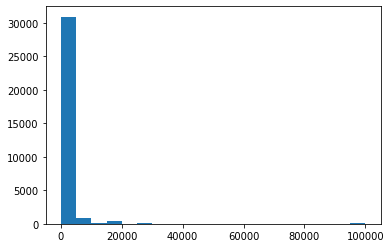

In [21]:
plt.hist(income94.capital_gain, bins = 20)

(array([3.1047e+04, 6.0000e+00, 1.5000e+01, 2.0000e+00, 8.0000e+00,
        1.3000e+01, 1.0500e+02, 3.5600e+02, 4.7500e+02, 3.0400e+02,
        1.1900e+02, 8.8000e+01, 1.2000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,  217.8,  435.6,  653.4,  871.2, 1089. , 1306.8, 1524.6,
        1742.4, 1960.2, 2178. , 2395.8, 2613.6, 2831.4, 3049.2, 3267. ,
        3484.8, 3702.6, 3920.4, 4138.2, 4356. ]),
 <a list of 20 Patch objects>)

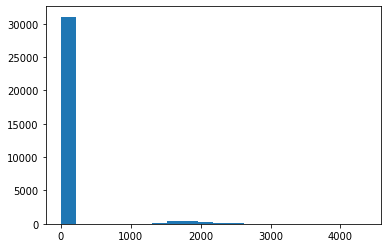

In [22]:
plt.hist(income94.capital_loss, bins = 20)

###Question 4

(array([4.4830e+03, 8.6340e+03, 1.0945e+04, 4.3820e+03, 2.5100e+03,
        9.8800e+02, 3.4100e+02, 1.3600e+02, 6.4000e+01, 3.8000e+01,
        1.5000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  12285.,   85906.,  159527.,  233148.,  306769.,  380390.,
         454011.,  527632.,  601253.,  674874.,  748495.,  822116.,
         895737.,  969358., 1042979., 1116600., 1190221., 1263842.,
        1337463., 1411084., 1484705.]),
 <a list of 20 Patch objects>)

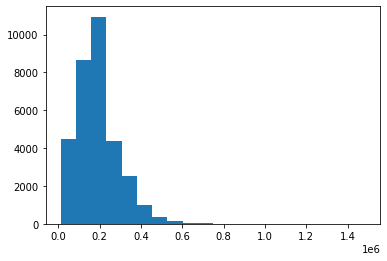

In [18]:
plt.hist(income94.fnlwgt, bins = 20)

The overall histogram of fnlwgt seems to be skewed to the right, and thus it is not symmetrically distributed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc392b81550>,
      dtype=object)

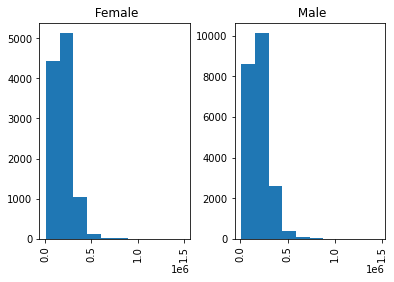

In [45]:
income94["fnlwgt"].hist(by=income94["sex"])

The shape of both female and male population appears to be skewed to the right, similar to the histogram of the overall population. However, the values y-axis of the female histogram are half that of the values of the male histogram.

Regarding outliers, the fnlwgt variable is meant to allow groups that are less represented in the dataset to have a more equal representation in calculations. Thus, it seems wrong to remove outliers from this variable, as they would most likely be data points that were weighted higher, and thus are from demographics that are less represented in the overall dataset. By removing the outliers, we risk removing entire demographics from our analysis, as stated in the text description of adult.names, "People with similar demographic characteristics should have similar weights."

##Correlation

In [38]:
df = income94[["age", "education_num", "hours_per_week"]]
df.corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


None of the variables seem strongly correlated. The highest correlation is between education_num and hours_per_week, at 0.14. However, that number is still quite small. Since it is the only value that is greater than |0.1|, it is the only one we will statistically test.

To test the correlation coefficient, we will perform a hypothesis test. Our null hypothesis is that education_num and hours_per_week have no relationship. Our alternate hypothesis is that there is a relationship between education_num and hours_per_week. We will use a significance level of 0.05.

In [47]:
stats.pearsonr(income94["education_num"], income94["hours_per_week"])

(0.1481227326229122, 4.2366474790836004e-159)

We can see that the p-value is much smaller than our significance level. Thus, we can reject the null hypothesis and state that education_num and hours_per_week do have a relationship. I'm not entirely certain what education_num represents. Thus, I don't think I am equipped to determine whether or not this direction or significance is expected, as I don't actually know what the connection between them is. I will say that the correlation seems very weak, so I was a bit surprised that the relationship was in fact significant.

In [69]:
income94_female = income94[income94["sex"] == " Female"]
stats.pearsonr(income94_female["education_num"], income94_female["hours_per_week"])

(0.1787490716478521, 4.96659881860534e-78)

In [70]:
income94_male = income94[income94["sex"] == " Male"]
stats.pearsonr(income94_male["education_num"], income94_male["hours_per_week"])

(0.13678240002850428, 1.7342523181609486e-91)

The correlation coefficients for both male and female participants are quite close to the correlation coefficient of the entire dataset, with women being slightly higher and men being slightly lower. The p-values differ as well, but they remain less than 0.05, so we can still reject the null hypothesis for both cases. None of this is unexpected.

In [79]:
income94["weighted_education_num"] = income94["education_num"] * income94["fnlwgt"]
income94["weighted_hours_per_week"] = income94["hours_per_week"] * income94["fnlwgt"]
income94[["education_num", "weighted_education_num", "hours_per_week", "weighted_hours_per_week"]].var()

education_num              6.618890e+00
weighted_education_num     1.390253e+12
hours_per_week             1.524590e+02
weighted_hours_per_week    2.450618e+13
dtype: float64

In the weighted version of each column, we can see that the variance is significantly larger.

In [80]:
income94[["education_num", "weighted_education_num", "hours_per_week", "weighted_hours_per_week"]].cov()

,education_num,weighted_education_num,hours_per_week,weighted_hours_per_week
education_num,6.618890e+00,1.178453e+06,4.705338e+00,4.066383e+05
weighted_education_num,1.178453e+06,1.390253e+12,6.343728e+05,4.558904e+12
hours_per_week,4.705338e+00,6.343728e+05,1.524590e+02,2.678528e+07
weighted_hours_per_week,4.066383e+05,4.558904e+12,2.678528e+07,2.450618e+13


Similarly, the weighted covariance between education_num and hours_per_week is significantly larger than the unweighted covariance. Since the variance and covariance increases in all weighted cases, this could mean that there are not many values that deviate far from the mean in the dataset. That would explain why when the weight of underrepresented groups is increased, the variance and covariance between education_num and hours_per_week increases.

##Regression

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:04:49   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4104      0.116    314.412      0.0

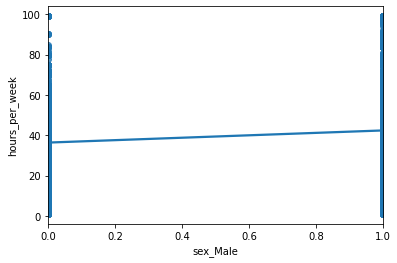

In [152]:
dummy_income94 = pd.get_dummies(income94, columns=["sex", "gross_income_group"])
dummy_income94 = dummy_income94.rename(columns={"sex_ Male":"sex_Male", "gross_income_group_ >50K":"gross_income_group_over_50K"})
reg1 = smf.ols('hours_per_week ~ sex_Male', data = dummy_income94).fit()
print(reg1.summary())
sns.regplot(x='sex_Male', y='hours_per_week', data=dummy_income94)

We can see that coefficient for the sex variable (which I have taken to represent whether or not a participant is male) is positive. This means that men do tend to work more hours than woman.

In [148]:
reg2 = smf.ols('hours_per_week ~ sex_Male + education_num', data = dummy_income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        03:27:30   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

Men still seem to work more hours than woman when education_num is included. However, the intercept of the data is significantly lower. The coefficient of the sex_Male variable is quite similar. Thus, the education_num variable seems to affect the steepness of the regression by a noticeable amount.

In [154]:
reg3 = smf.ols('hours_per_week ~ sex_Male + education_num + gross_income_group_over_50K', data = dummy_income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:05:28   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

I would use the R-squared value to determine the best model, since it is a statistical measure of how close the data is to the regression line. Since the highest R-squared value belongs to the regression with three variables, I would pick it as the best model.